In [60]:
# install.packages("caret")
# install.packages("ROSE")
# install.packages("randomForest")
# install.packages("xgboost")
# install.packages("caTools")

In [61]:
library(dplyr)       
library(caret)
library(ROSE)
library(randomForest)
library(xgboost)
library(caTools)

#### Load the Dataset


In [62]:
df <- read.csv('adult.csv')
df

X39,State.gov,X77516,Bachelors,X13,Never.married,Adm.clerical,Not.in.family,White,Male,X2174,X0,X40,United.States,X..50K
<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [63]:
summary(df)

      X39         State.gov             X77516         Bachelors        
 Min.   :17.00   Length:32560       Min.   :  12285   Length:32560      
 1st Qu.:28.00   Class :character   1st Qu.: 117832   Class :character  
 Median :37.00   Mode  :character   Median : 178363   Mode  :character  
 Mean   :38.58                      Mean   : 189782                     
 3rd Qu.:48.00                      3rd Qu.: 237054                     
 Max.   :90.00                      Max.   :1484705                     
      X13        Never.married      Adm.clerical       Not.in.family     
 Min.   : 1.00   Length:32560       Length:32560       Length:32560      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

In [64]:
str(df)

'data.frame':	32560 obs. of  15 variables:
 $ X39          : int  50 38 53 28 37 49 52 31 42 37 ...
 $ State.gov    : chr  " Self-emp-not-inc" " Private" " Private" " Private" ...
 $ X77516       : int  83311 215646 234721 338409 284582 160187 209642 45781 159449 280464 ...
 $ Bachelors    : chr  " Bachelors" " HS-grad" " 11th" " Bachelors" ...
 $ X13          : int  13 9 7 13 14 5 9 14 13 10 ...
 $ Never.married: chr  " Married-civ-spouse" " Divorced" " Married-civ-spouse" " Married-civ-spouse" ...
 $ Adm.clerical : chr  " Exec-managerial" " Handlers-cleaners" " Handlers-cleaners" " Prof-specialty" ...
 $ Not.in.family: chr  " Husband" " Not-in-family" " Husband" " Wife" ...
 $ White        : chr  " White" " White" " Black" " Black" ...
 $ Male         : chr  " Male" " Male" " Male" " Female" ...
 $ X2174        : int  0 0 0 0 0 0 0 14084 5178 0 ...
 $ X0           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X40          : int  13 40 40 40 40 16 45 50 40 80 ...
 $ United.States: chr  " United-S

In [65]:
names(df)

[1] "X39"           "State.gov"     "X77516"        "Bachelors"    
 [5] "X13"           "Never.married" "Adm.clerical"  "Not.in.family"
 [9] "White"         "Male"          "X2174"         "X0"           
[13] "X40"           "United.States" "X..50K"

In [66]:
dim(df)

[1] 32560    15

In [67]:
rows_of_df <- nrow(df)
rows_of_df

[1] 32560

In [68]:
cols_of_df <- ncol(df)
cols_of_df

[1] 15

In [69]:
# 14 independent and 1 dependent variable

In [70]:
# Convert character columns to factor
df <- df %>%
  mutate_if(is.character, as.factor)

In [71]:
df[df == " ?"] <- NA

#### Remove irrelevant variables:

In [72]:
df <- df[, sapply(df, function(x) {
  if (is.factor(x)) {
    return(TRUE)  # Exclude factor variables
  } else {
    return(var(x) > 0)  # Calculate variance for non-factor variables
  }
})]

In [73]:
d<-dim(df)

In [74]:
# Print the number and proportion of irrelevant predictive/independent variables removed
rmvd <- cols_of_df - d[2]
prop <- rmvd / cols_of_df
print(paste("Number of Irrelevant Variables Removed:", rmvd))
print(paste("Proportion of Irrelevant Variables Removed:", prop))

[1] "Number of Irrelevant Variables Removed: 0"
[1] "Proportion of Irrelevant Variables Removed: 0"


#### Identify and remove out outliers:

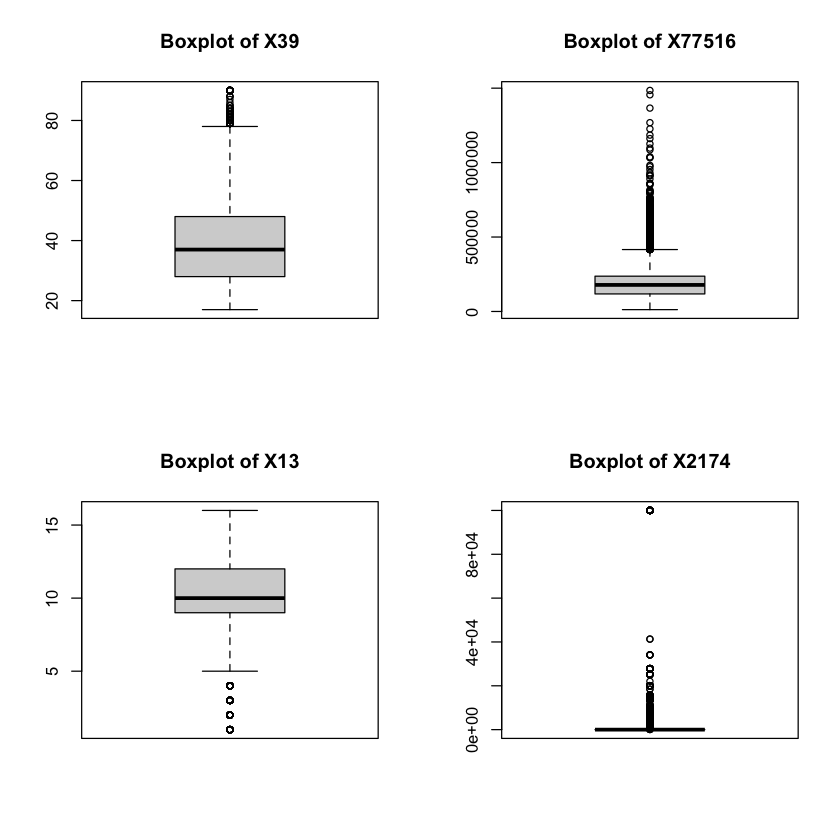

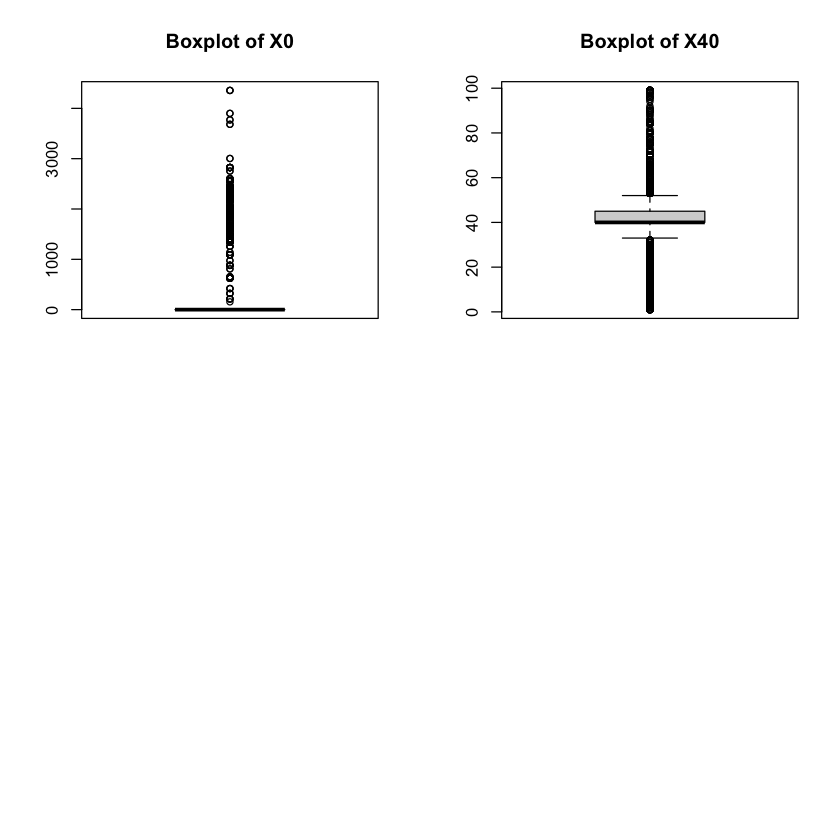

In [75]:
par(mfrow=c(2,2))

cols <- c('X39','X77516','X13','X2174','X0','X40')

for (col in cols) {
  boxplot(df[[col]], main = paste("Boxplot of", col))
}

In [76]:
winso <- function(x) {
  Q1 <- quantile(x, 0.25)
  Q3 <- quantile(x, 0.75)
  IQR <- Q3 - Q1
  lower_threshold <- Q1 - 1.5 * IQR
  upper_threshold <- Q3 + 1.5 * IQR
  outliers <- x < lower_threshold | x > upper_threshold
  return(outliers)
}

In [77]:
# assign numerical variables to nuim_vars
num_vars <- sapply(df, is.numeric)

# identify outliers i the dataframe
outlier <- sapply(df[, num_vars], winso)

# sum of outliers
total <- sum(rowSums(outlier))
total

[1] 15571

In [78]:
new_df <- as.data.frame(lapply(df[, num_vars], winso))

In [79]:
# Count the number of outliers filtered
fltrd <- sum(new_df != df[, num_vars])

In [80]:
# Calculate the proportion of outliers filtered
prop <- fltrd / (nrow(df) * length(num_vars))

In [81]:
# Output the results
cat("Number of outliers filtered:", fltrd, "\n")
cat("Proportion of outliers filtered:", prop, "\n")

Number of outliers filtered: 134399 
Proportion of outliers filtered: 0.2751822 


#### Romove duplicates

In [82]:
dimention <- dim(new_df)

In [83]:
new_df <- unique(df)

In [84]:
dimention_after <- dim(new_df)

In [85]:
removed <- dimention - dimention_after[1]
prop <- removed / dimention
print(paste("Number of Duplicate Records Removed:", removed))
print(paste("Proportion of Duplicate Records Removed:", prop))

[1] "Number of Duplicate Records Removed: 24"    
[2] "Number of Duplicate Records Removed: -32530"
[1] "Proportion of Duplicate Records Removed: 0.000737100737100737"
[2] "Proportion of Duplicate Records Removed: -5421.66666666667"   


#### Remove Missing Values

In [86]:
sum(is.na(new_df))

[1] 4261

In [87]:
colSums(is.na(new_df))

X39     State.gov        X77516     Bachelors           X13 
            0          1836             0             0             0 
Never.married  Adm.clerical Not.in.family         White          Male 
            0          1843             0             0             0 
        X2174            X0           X40 United.States        X..50K 
            0             0             0           582             0

In [88]:
new_df[new_df == " ?"] <- NA

In [89]:
unique_values <- unique(new_df$State.gov)
unique_values

[1]  Self-emp-not-inc  Private           State-gov         Federal-gov     
[5]  Local-gov        <NA>               Self-emp-inc      Without-pay     
[9]  Never-worked    
9 Levels:  ?  Federal-gov  Local-gov  Never-worked  Private ...  Without-pay

In [90]:
unique_values <- unique(new_df$Adm.clerical)
unique_values

[1]  Exec-managerial    Handlers-cleaners  Prof-specialty     Other-service    
 [5]  Adm-clerical       Sales              Craft-repair       Transport-moving 
 [9]  Farming-fishing    Machine-op-inspct  Tech-support      <NA>              
[13]  Protective-serv    Armed-Forces       Priv-house-serv  
15 Levels:  ?  Adm-clerical  Armed-Forces  Craft-repair ...  Transport-moving

In [91]:
unique_values <- unique(new_df$United.States)
unique_values

[1]  United-States               Cuba                      
 [3]  Jamaica                     India                     
 [5] <NA>                         Mexico                    
 [7]  South                       Puerto-Rico               
 [9]  Honduras                    England                   
[11]  Canada                      Germany                   
[13]  Iran                        Philippines               
[15]  Italy                       Poland                    
[17]  Columbia                    Cambodia                  
[19]  Thailand                    Ecuador                   
[21]  Laos                        Taiwan                    
[23]  Haiti                       Portugal                  
[25]  Dominican-Republic          El-Salvador               
[27]  France                      Guatemala                 
[29]  China                       Japan                     
[31]  Yugoslavia                  Peru                      
[33]  Outlying-US(Guam-USVI-etc)  Scotland                  
[35]  Trinadad&Tobago             Greece                    
[37]  Nicaragua                   Vietnam                   
[39]  Hong                        Ireland                   
[41]  Hungary                     Holand-Netherlands        
42 Levels:  ?  Cambodia  Canada  China  Columbia  Cuba ...  Yugoslavia

In [92]:
cols <- c("State.gov", "Adm.clerical", "United.States")


for (column in cols) {
  # mode
  mode <- names(sort(table(new_df[[column]]), decreasing = TRUE))[1]
  
  # Impute missing values using the mode
  new_df[[column]][is.na(new_df[[column]])] <- mode
}


In [93]:
sum(is.na(new_df))

[1] 0

#### Dimensionality reduction based on PCA

In [94]:
# numeric variables
num_cols <- sapply(new_df, is.numeric)

In [95]:
# PCA 
pca <- prcomp(new_df[, num_cols], scale. = TRUE)

In [96]:
# Summary of PCA results
summary(pca)

Importance of components:
                          PC1    PC2    PC3    PC4    PC5    PC6
Standard deviation     1.1448 1.0203 1.0092 0.9707 0.9414 0.8952
Proportion of Variance 0.2184 0.1735 0.1698 0.1570 0.1477 0.1336
Cumulative Proportion  0.2184 0.3919 0.5617 0.7187 0.8664 1.0000

In [97]:
# Extract the principal components
principal_components <- pca$x

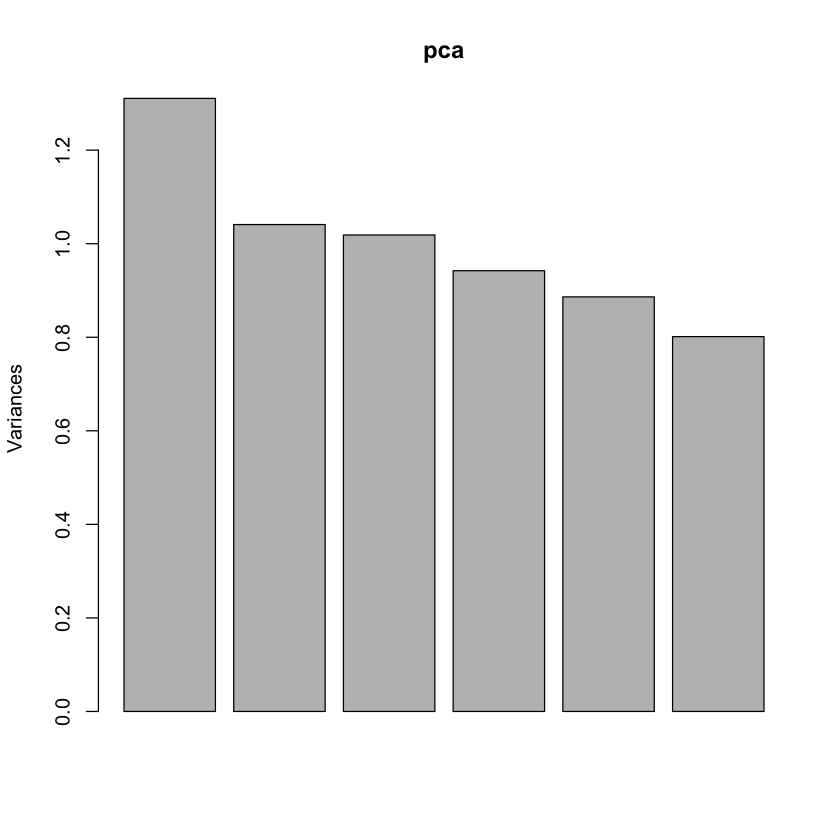

In [98]:
# Optional: Scree plot
plot(pca)

In [99]:
# Assuming 'pca_result' contains the PCA-transformed features and 'new_df' is the original dataset
df_new <- cbind(new_df, principal_components)

#### Correlation matrix

In [100]:
# convert factor to numeric
factor_columns <- sapply(df_new, is.factor)
df_new[factor_columns] <- lapply(df_new[factor_columns], as.numeric)

# correlation matrix
cormat <- round(cor(df_new), 2)

In [101]:
get_upper_tri <- function(cormat)
    
{   
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
}

In [102]:
upper_tri <- get_upper_tri(cormat)

In [103]:
# Melt the correlation matrix
library(reshape2)
cor_melt <- melt(upper_tri, na.rm = TRUE)

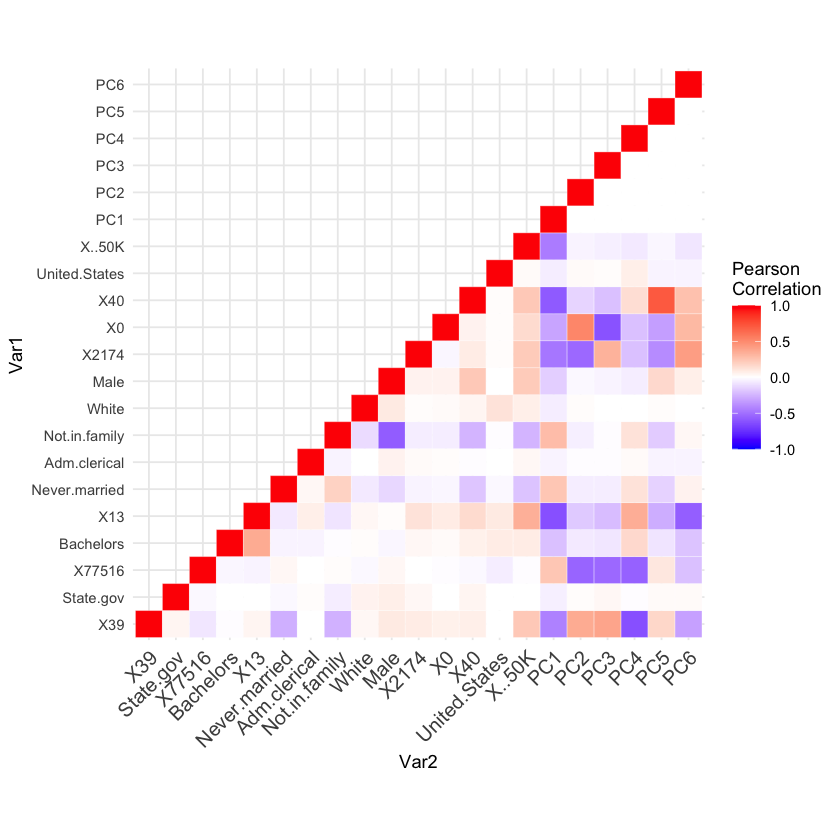

In [104]:
# Heatmap
library(ggplot2)

ggplot(data = cor_melt, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

#### Normalise the data

In [105]:
# Normalize numerical variables using Min-Max scaling

df_new[, sapply(df_new, is.numeric)] <- 
                apply(df_new[, sapply(df_new, is.numeric)], 
                2, function(x) (x - min(x)) / (max(x) - min(x)))

In [106]:
print("Min-Max Scaled Data:")
print(head(df_new))

[1] "Min-Max Scaled Data:"
        X39 State.gov    X77516  Bachelors       X13 Never.married Adm.clerical
1 0.4520548 0.7142857 0.0482376 0.60000000 0.8000000     0.3333333    0.2307692
2 0.2876712 0.4285714 0.1381134 0.73333333 0.5333333     0.0000000    0.3846154
3 0.4931507 0.4285714 0.1510683 0.06666667 0.4000000     0.3333333    0.3846154
4 0.1506849 0.4285714 0.2214884 0.60000000 0.8000000     0.3333333    0.6923077
5 0.2739726 0.4285714 0.1849316 0.80000000 0.8666667     0.3333333    0.2307692
6 0.4383562 0.4285714 0.1004482 0.40000000 0.2666667     0.5000000    0.5384615
  Not.in.family White Male X2174 X0       X40 United.States X..50K       PC1
1           0.0   1.0    1     0  0 0.1224490          0.95      0 0.7044156
2           0.2   1.0    1     0  0 0.3979592          0.95      0 0.7318749
3           0.0   0.5    1     0  0 0.3979592          0.95      0 0.7356167
4           1.0   0.5    0     0  0 0.3979592          0.10      0 0.7049049
5           1.0   1.0    0  

#### Balance the data

In [107]:
df_new <- ovun.sample(X..50K ~ ., data = df_new, method = "both", N = nrow(df), seed = 123)$data

In [108]:
write.csv(df_new, file = "adult_r_preprocessed.csv", row.names = FALSE) 

#### Modelling 

#### Train Test Split

In [109]:
class_distribution <- table(new_df$X..50K)
print("Class Distribution:")
print(class_distribution)

[1] "Class Distribution:"

 <=50K   >50K 
 24697   7839 


In [110]:
# Train test Split
set.seed(123)  
trainIndex <- createDataPartition(df_new[["X..50K"]], p = 0.7, list = FALSE)
train_data <- df_new[trainIndex, , drop = FALSE] 
test_data <- df_new[-trainIndex, , drop = FALSE]  


In [111]:
train_class_distribution <- table(train_data$X..50K)
test_class_distribution <- table(test_data$X..50K)

print("Train Class Distribution:")
print(train_class_distribution)
print("Test Class Distribution:")
print(test_class_distribution)

[1] "Train Class Distribution:"

    0     1 
11456 11336 
[1] "Test Class Distribution:"

   0    1 
5035 4733 


In [112]:
class(train_data$X..50K)
class(test_data$X..50K)

[1] "numeric"

[1] "numeric"

In [113]:
train_data$X..50K <- as.factor(train_data$X..50K)
test_data$X..50K <- as.factor(test_data$X..50K)

#### Random Forest

In [114]:
rf <- randomForest(X..50K ~ ., 
                   data = train_data, 
                   ntree = 500, 
                   type = "classification"
)

In [115]:
summary(rf)

                Length Class  Mode     
call                5  -none- call     
type                1  -none- character
predicted       22792  factor numeric  
err.rate         1500  -none- numeric  
confusion           6  -none- numeric  
votes           45584  matrix numeric  
oob.times       22792  -none- numeric  
classes             2  -none- character
importance         20  -none- numeric  
importanceSD        0  -none- NULL     
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               22792  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

In [116]:
# Make predictions on the test set
pred <- predict(rf, test_data)

In [117]:
confusion_matrix <- table(pred, test_data$X..50K)
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(confusion_matrix)
print(paste("Accuracy:", accuracy))

    
pred    0    1
   0 4491  219
   1  544 4514
[1] "Accuracy: 0.921887796887797"


In [118]:
precision_0 <- 4491 / (4491 + 544)
recall_0 <- 4491 / (4491 + 219)
precision_1 <- 4514 / (4514 + 219)
recall_1 <- 4514 / (4514 + 544)

f1_0 <- 2 * (precision_0 * recall_0) / (precision_0 + recall_0)

f1_1 <- 2 * (precision_1 * recall_1) / (precision_1 + recall_1)

cat("F1 Score class 0:", f1_0, "\n")
cat("F1 Score class 1:", f1_1, "\n")


F1 Score class 0: 0.9217034 
F1 Score class 1: 0.9220713 


#### Gradient Boosting

In [119]:
# Set seed for reproducibility
set.seed(123)

In [120]:
# Split the data into training and testing sets
split <- sample.split(df_new, SplitRatio = 0.8) 

In [121]:
# Create the training set
train_data <- subset(df_new, split == TRUE)

In [122]:
# Create the testing set
test_data <- subset(df_new, split == FALSE)

In [123]:
# Perform one-hot encoding on factor variables
train_data_encoded <- model.matrix(~ . - 1, data = train_data[, -which(names(train_data) == "X..50K")])
test_data_encoded <- model.matrix(~ . - 1, data = test_data[, -which(names(test_data) == "X..50K")])

In [124]:
# # Encode the target variable as a factor
# train_data$X..50K <- as.factor(train_data$X..50K)

In [125]:
# # Convert factor levels to numeric (0 and 1)
# train_data$X..50K <- as.numeric(train_data$X..50K) - 1

In [126]:
# Train the XGBoost model
xgb <- xgboost(
  data = as.matrix(train_data_encoded),
  label = train_data$X..50K,
  nrounds = 100,
  objective = "multi:softmax",
  num_class = 2)

[1]	train-mlogloss:0.565105 
[2]	train-mlogloss:0.494267 
[3]	train-mlogloss:0.449428 
[4]	train-mlogloss:0.418113 
[5]	train-mlogloss:0.395950 
[6]	train-mlogloss:0.380102 
[7]	train-mlogloss:0.368355 
[8]	train-mlogloss:0.359206 
[9]	train-mlogloss:0.351559 
[10]	train-mlogloss:0.343710 
[11]	train-mlogloss:0.339144 
[12]	train-mlogloss:0.335627 
[13]	train-mlogloss:0.332891 
[14]	train-mlogloss:0.328116 
[15]	train-mlogloss:0.322597 
[16]	train-mlogloss:0.320032 
[17]	train-mlogloss:0.312654 
[18]	train-mlogloss:0.307967 
[19]	train-mlogloss:0.305633 
[20]	train-mlogloss:0.302984 
[21]	train-mlogloss:0.301146 
[22]	train-mlogloss:0.297404 
[23]	train-mlogloss:0.291956 
[24]	train-mlogloss:0.290337 
[25]	train-mlogloss:0.288443 
[26]	train-mlogloss:0.285173 
[27]	train-mlogloss:0.283953 
[28]	train-mlogloss:0.282578 
[29]	train-mlogloss:0.282032 
[30]	train-mlogloss:0.281155 
[31]	train-mlogloss:0.279320 
[32]	train-mlogloss:0.276558 
[33]	train-mlogloss:0.273846 
[34]	train-mlogloss

In [127]:
print(xgb)

##### xgb.Booster
raw: 644.3 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, objective = "multi:softmax", num_class = 2)
params (as set within xgb.train):
  objective = "multi:softmax", num_class = "2", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 20 
niter: 100
nfeatures : 20 
evaluation_log:
     iter train_mlogloss
    <num>          <num>
        1      0.5651051
        2      0.4942675
---                     
       99      0.1784785
      100      0.1769487


In [128]:
summary(xgb)

               Length Class              Mode       
handle              1 xgb.Booster.handle externalptr
raw            659739 -none-             raw        
niter               1 -none-             numeric    
evaluation_log      2 data.table         list       
call               15 -none-             call       
params              3 -none-             list       
callbacks           2 -none-             list       
feature_names      20 -none-             character  
nfeatures           1 -none-             numeric    

In [129]:
pred_test <- predict(xgb, test_data_encoded)

In [130]:
pred_test <- as.factor(pred_test)

In [131]:
accuracy <- mean(pred_test == test_data$X..50K)
print(paste("Accuracy:", accuracy))

[1] "Accuracy: 0.89125386996904"
